<a href="https://colab.research.google.com/github/hekmat-ashqer/MLJourney2024/blob/main/cereals_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Inspection Exercise (Practice)

- Student Name: Hikmat Ashqar


Instructions

For this task, you will use a modified version of the cereals dataset. You can find the data dictionary on Kaggle.


This dataset shows popular cereals by brand and manufacturer, along with nutrition facts. The machine learning question is:


How well can the "rating" of cereal be predicted using the following features?


mfr, type, calories, protein, fat, fiber, sugars, shelf
At this point, you are just completing the feature inspection /exploratory data analysis.


## EDA Functions

### Univariate EDA Functions

In [ ]:
# Basic imports for functions
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE PLOTTING FUNCTIONS FOR EDA
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):
  """Creates a seaborn countplot with the option to temporarily fill missing values
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}", fontweight='bold')

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100

  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax


def explore_numeric(df, x, figsize=(6,5) ):
  """Creates a seaborn histplot and boxplot with a share x-axis,
  Prints statements about null values, cardinality, and checks for
  constant/quasi-constant features.
  Source:{PASTE IN FINAL LESSON LINK}
  """

  ## Save null value counts and percent for printing
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100


  ## Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])

  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  ## Adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()


  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = df[x].nunique()
  print(f"- Unique Values: {nunique}")


  # Get the most most common value, its count as # and as %
  most_common_val_count = df[x].value_counts(dropna=False).head(1)
  most_common_val = most_common_val_count.index[0]
  freq = most_common_val_count.values[0]
  perc_most_common = freq / len(df) * 100

  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")

  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, axes


### Multivariate Feature vs. Target Functions.

In [ ]:
"""MULTIVARIATE PLOTTING FUNCTIONS VS. NUMERIC TARGET"""

def plot_categorical_vs_target(df, x, y='charges',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  """Plots a combination of a seaborn barplot of means combined with
  a seaborn stripplot to show the spread of the data.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax


def plot_numeric_vs_target(df, x, y='charges',
                           figsize=(6,4)):
  """Plots a seaborn regplot with Pearson's correlation (r) added
  to the title.
  Source:{PASTE IN FINAL LESSON LINK}
  """
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # Make sure the plot is shown before the print statement
  plt.show()

  return fig, ax

# Your Work Here:

## Import Packages and Load Data

### Data Dictionary

*	Name: Name of cereal

*	mfr: Manufacturer of cereal
	* A = American Home Food Products;
	* G = General Mills
	* K = Kelloggs
	* N = Nabisco
	* P = Post
	* Q = Quaker Oats
	* R = Ralston Purina
*	type:
  *	cold
  *	hot
*	calories: calories per serving
*	protein: grams of protein
*	fat: grams of fat
*	sodium: milligrams of sodium
*	fiber: grams of dietary fiber
*	carbo: grams of complex carbohydrates
*	sugars: grams of sugars
*	potass: milligrams of potassium
*	vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended
*	shelf: display shelf (1, 2, or 3, counting from the floor)
*	weight: weight in ounces of one serving
*	cups: number of cups in one serving
*	rating: a rating of the cereals (Possibly from Consumer Reports?)


### Data Load

In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path= "/content/drive/MyDrive/Colab Notebooks/First stack/Data sets/cereal-kaggle-crawford-modified-sheet-1.csv"
df = pd.read_csv(path)
df.head()
df.info()
temp_df = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       75 non-null     object 
 2   type      77 non-null     object 
 3   calories  72 non-null     float64
 4   protein   77 non-null     int64  
 5   fat       70 non-null     float64
 6   sodium    77 non-null     int64  
 7   fiber     71 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    71 non-null     float64
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     75 non-null     object 
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(8), int64(4), object(4)
memory usage: 9.8+ KB


In [ ]:
# we identify list of needed columns as requested
columns_needed = ['mfr', 'type', 'calories', 'protein', 'fat', 'fiber', 'sugars', 'shelf','rating']
# Select only the columns in columns_needed
df_filtered = df[columns_needed]
# Calculate the columns to drop
columns_to_drop = df.columns.difference(columns_needed)
columns_to_drop
# Drop these columns
df = df.drop(columns=columns_to_drop)
df

,mfr,type,calories,protein,fat,fiber,sugars,shelf,rating
0,N,C,NaN,4,1.0,10.0,6.0,top,68.402973
1,Q,C,120.0,3,5.0,2.0,8.0,top,33.983679
2,K,C,70.0,4,1.0,9.0,5.0,top,59.425505
3,K,C,50.0,4,0.0,14.0,0.0,top,93.704912
4,R,C,NaN,2,2.0,1.0,8.0,NaN,34.384843
...,...,...,...,...,...,...,...,...,...
72,G,C,110.0,2,1.0,0.0,3.0,top,39.106174
73,G,C,110.0,1,1.0,0.0,12.0,middle,27.753301
74,R,C,100.0,3,1.0,3.0,3.0,bottom,49.787445
75,G,C,100.0,3,1.0,3.0,3.0,bottom,51.592193


## Answer the following questions:

- Define your target column:
  - rating
- Is this a classification or regression task?
  - regression becuase the rating is numerical

Business understtanding :
How well can the "rating" of cereal be predicted using the following features?



## Inspecting Each Feature

### mfr

- mfr: Manufacturer of cereal
  - A = American Home Food Products;
  - G = General Mills
  - K = Kelloggs
  - N = Nabisco
  - P = Post
  - Q = Quaker Oats
  - R = Ralston Purina

  

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "mfr"
df[feature].dtype

dtype('O')

<ipython-input-53-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


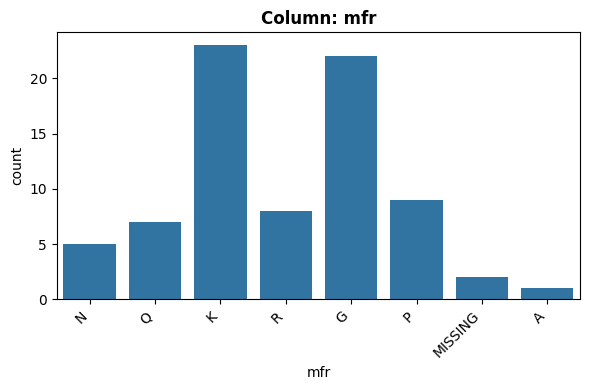

- NaN's Found: 2 (2.6%)
- Unique Values: 8
- Most common value: 'K' occurs 23 times (29.87%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - categorical (nominal)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 null values (2.6%)
  - Impute with "MISSING" placeholder.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 8 unique categories.
  - Not high cardinality (not >10)

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-54-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'mfr vs. rating'}, xlabel='mfr', ylabel='rating'>)

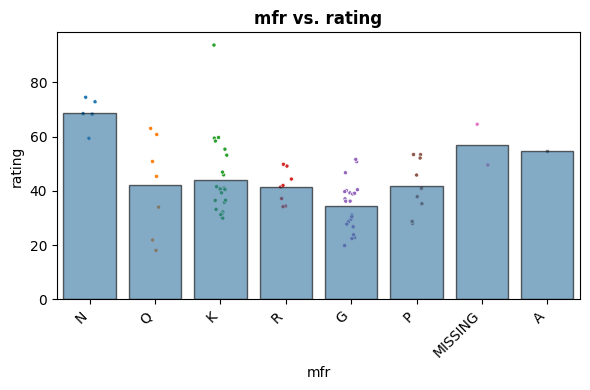

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature,'rating')

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes.
  - Does this feature appear to be a predictor of the target?
    - Yes it does, there is variability between the groups, even though some have similar means.

___

### type

- type: hot or cold
  

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "type"
df[feature].dtype

dtype('O')

<ipython-input-53-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


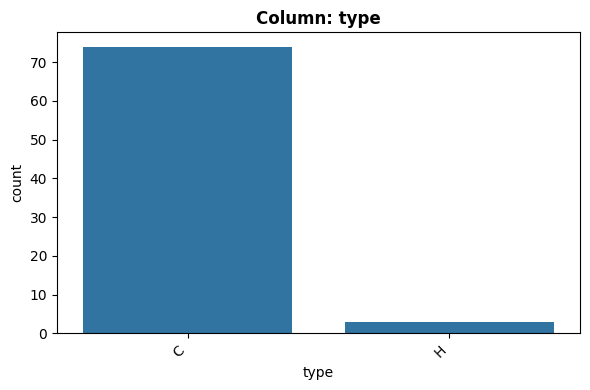

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'C' occurs 74 times (96.1%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Categorical

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0. Nothing to impute.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 2 unique values (very low).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-54-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


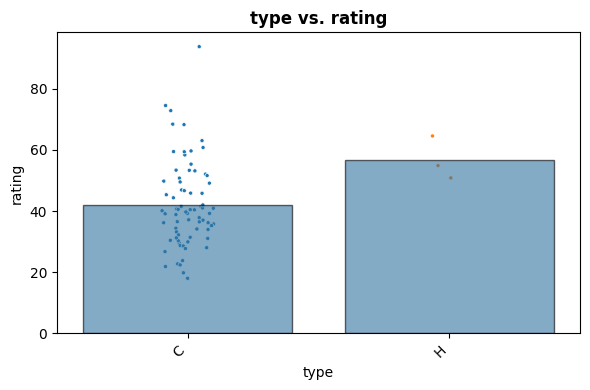

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think one might be rated higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, hot cereals seem to get a higher rating.

___

### calories

- calories: calories per serving

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "calories"
df[feature].dtype

dtype('float64')

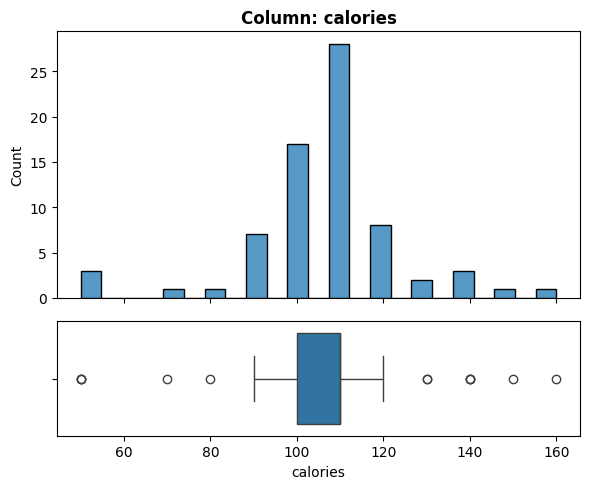

- NaN's Found: 5 (6.49%)
- Unique Values: 11
- Most common value: '110.0' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 5 (6.49%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



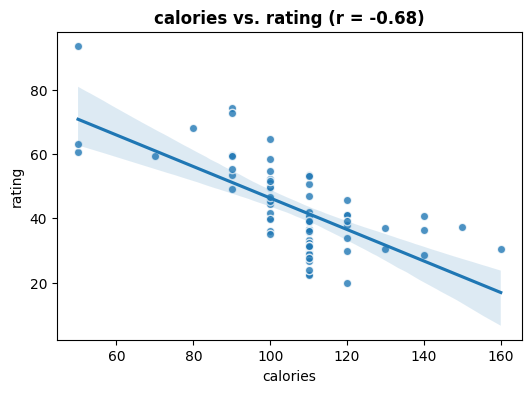

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people may prefer high calorie cereals.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than I expected!

___

### protein

- protein: grams of protein
  

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "protein"
df[feature].dtype

dtype('int64')

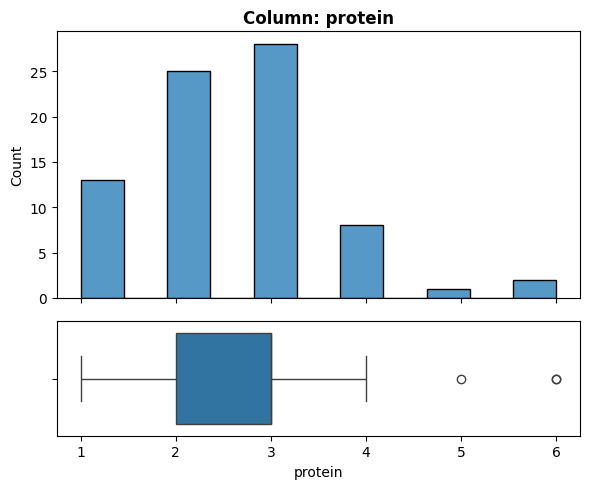

- NaN's Found: 0 (0.0%)
- Unique Values: 6
- Most common value: '3' occurs 28 times (36.36%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0 null values.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 6 unique values. Not high (since its \<10).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



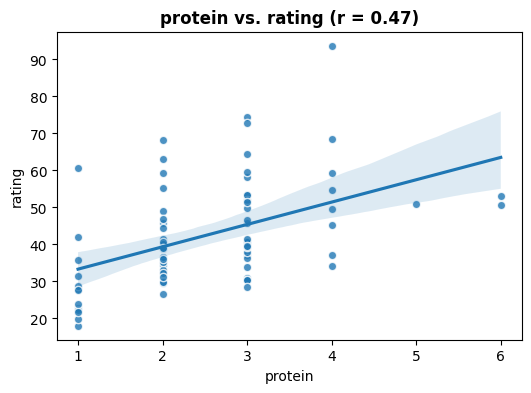

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df,feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I would assume more protein would be better.
  - Does this feature appear to be a predictor of the target?
    - Yes!

___

### fat

- fat: grams of fat
  

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "fat"
df[feature].dtype

dtype('float64')

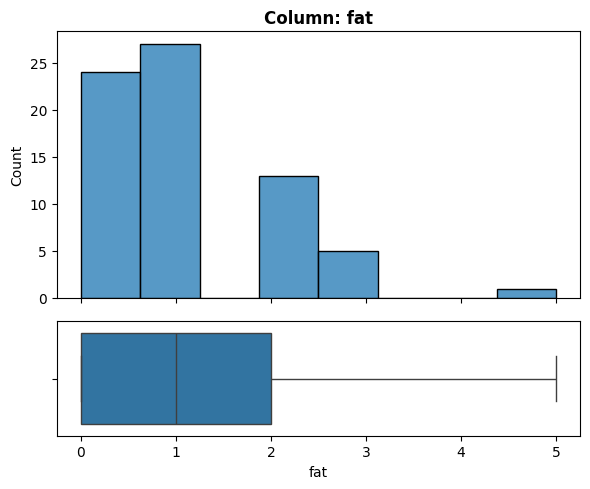

- NaN's Found: 7 (9.09%)
- Unique Values: 5
- Most common value: '1.0' occurs 27 times (35.06%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 7 (9%)
  - impute with median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



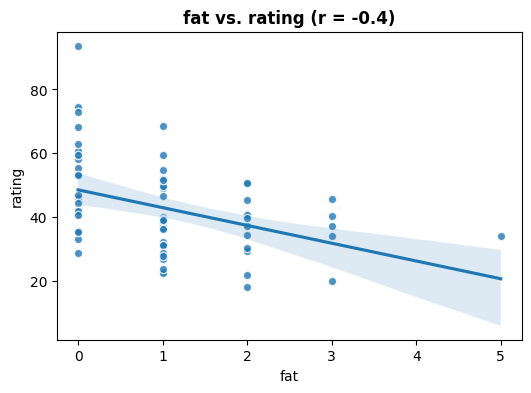

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I assume fatty cereals would be rated higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite direction than expected.

___

### fiber

- fiber: grams of dietary fiber

  

In [ ]:
# # Confirming the dtype to select correct EDA function
feature = "fiber"
df[feature].dtype

dtype('float64')

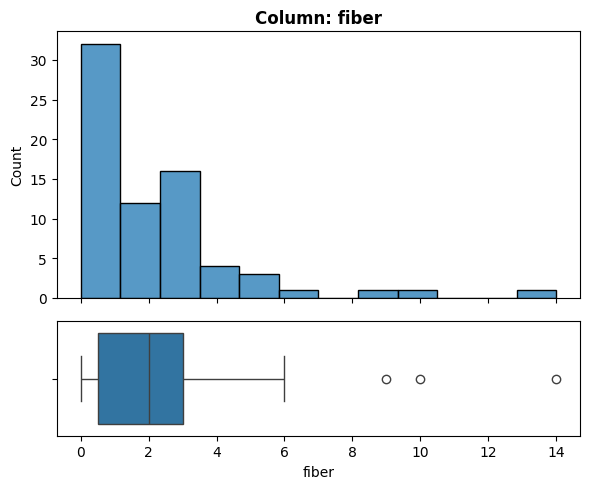

- NaN's Found: 6 (7.79%)
- Unique Values: 13
- Most common value: '0.0' occurs 18 times (23.38%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 (7.79%)
  - Impute with the median

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable (numeric).

5. Would we know this BEFORE the target is determined?
  - Yes.

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



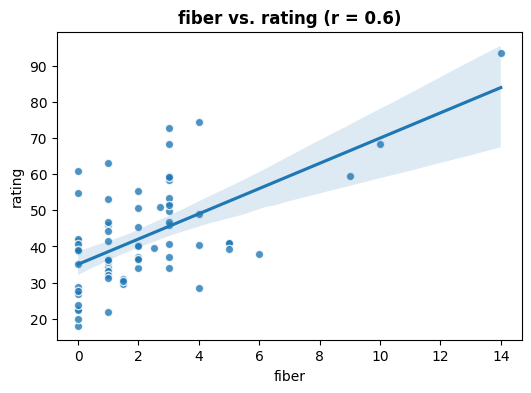

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes I would expect having more fiber corresponds with a higher rating.
  - Does this feature appear to be a predictor of the target?
    - Yes.

___

In [ ]:
df.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'fiber', 'sugars', 'shelf',
       'rating'],
      dtype='object')

### sugars

- sugars: grams of sugars

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "sugars"
df[feature].dtype

dtype('float64')

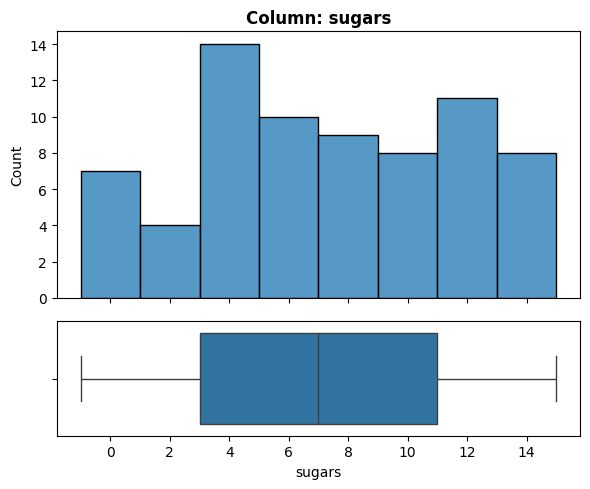

- NaN's Found: 6 (7.79%)
- Unique Values: 17
- Most common value: '3.0' occurs 13 times (16.88%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df,feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric.

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 6 (7.79%)
  - Impute with the median.

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - Not applicable, numeric.

5. Would we know this BEFORE the target is determined?
  - Yes

6. Is there a business case/understanding reason to exclude based on our business case?
  - No



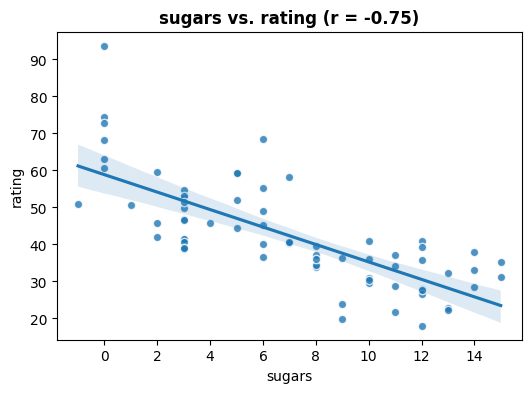

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_numeric_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - Yes, I think people would rate sugary cereals higher.
  - Does this feature appear to be a predictor of the target?
    - Yes, but opposite of what I expected.

___

### shelf

- shelf: display shelf (1, 2, or 3, counting from the floor)

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "shelf"
df[feature].dtype

dtype('O')

<ipython-input-53-dd9eff9c67b1>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


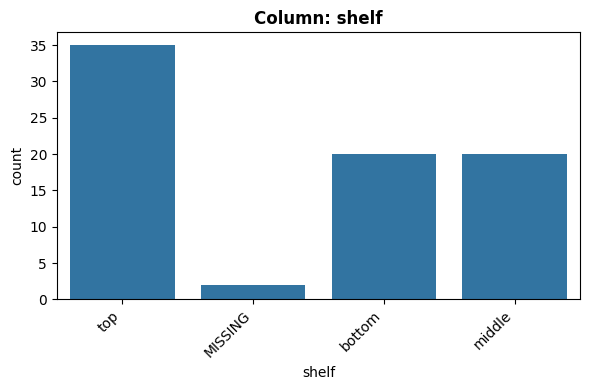

- NaN's Found: 2 (2.6%)
- Unique Values: 4
- Most common value: 'top' occurs 35 times (45.45%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_categorical(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - Ordinal. Data Dictionary says it should be integers: 1,2,3 with 1 being closest to the floor)

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 2 (2.6%)
  - Impute with a placeholder (0)

3. Is the feature constant or quasi-constant?
  - No.

4. What is the cardinality? Is it high?
  - 4 (including null values).

5. Would we know this BEFORE the target is determined?
  - Maybe?

6. Is there a business case/understanding reason to exclude based on our business case?
  - No.



<ipython-input-54-d79904e48e9f>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


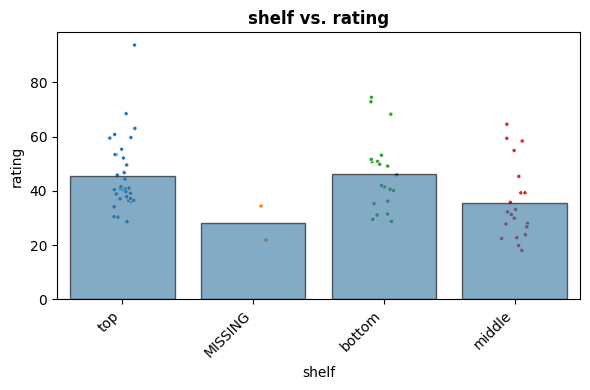

In [ ]:
# Run the appropriate feature vs. target function (based on dtype)
plot_categorical_vs_target(df, feature, 'rating');

- Feature vs. Target Observations:
  - Based on your business understanding, would you expect this feature to be a predictor of the target?
    - I am not sure.
  - Does this feature appear to be a predictor of the target?
    - Yes, it seems that being in the middle shelf is associated with a lower rating.

___

### rating (target)

- rating: a rating of the cereals (Possibly from Consumer Reports?)

  

In [ ]:
# Confirming the dtype to select correct EDA function
feature = "rating"
df[feature].dtype

dtype('float64')

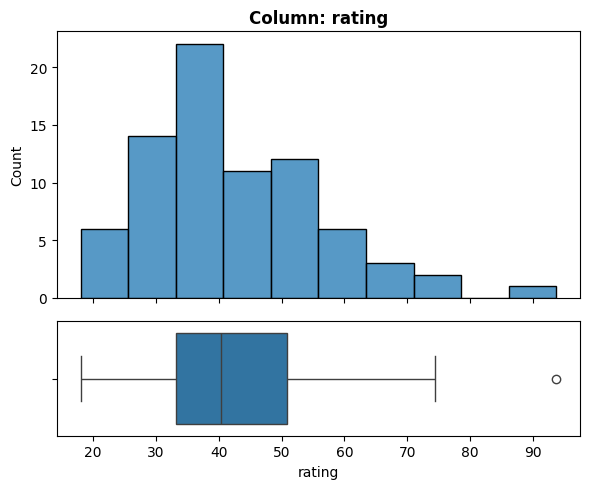

- NaN's Found: 0 (0.0%)
- Unique Values: 77
- Most common value: '68.402973' occurs 1 times (1.3%)
- Not constant or quasi-constant.


In [ ]:
# run the appropriate explore function (based on feature's dtype)
explore_numeric(df, feature);

**Feature Observations**

1. What type of feature is it? (Categorical (nominal), ordinal, numeric)
  - numeric. our target!

2. How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
  - 0

3. Is the feature constant or quasi-constant?
  - Not a feature!

4. What is the cardinality? Is it high?
  - N/A - numeric.

5. Would we know this BEFORE the target is determined?
  - Yes, since it IS our target!

6. Is there a business case/understanding reason to exclude based on our business case?
  - Yes, its our target!



# SimpleImputer Exercise

## Instructions

<table style="background-color: rgb(13,32,76); border-radius: 10px">
	<thead>
		<tr>
			<th colspan="2" style="border: hidden; vertical-align: top;" width="15%"><img src="https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1674755226__Icons_400px_Practice Assignment.png">
			</th>
			<th style="border: hidden;">
				<h1 style="color: white;">SimpleImputer Exercise (Practice)</h1>
			</th>
		</tr>
	</thead>
</table>
<h1>SimpleImputer Exercise</h1>
<h2>Instructions</h2>
<p>For this task, you will continue working with the <a href="https://drive.google.com/file/d/1-17RJeMvb7Ruak-NBLnLleQYL_4tOQn_/view?usp=share_link">modified version of the cereals dataset.</a> You can find the <a href="https://www.kaggle.com/datasets/crawford/80-cereals">data dictionary on Kaggle.</a></p>
<p>This dataset shows popular cereals by brand and manufacturer, along with nutrition facts. The machine learning question is:</p>
<p><em><strong>How well can the "rating" of cereal be predicted using the following features?</strong></em></p>
<ul>
<li>mfr, type, calories, protein, fat, fiber, sugars, shelf</li>
</ul>
<p>In the Feature Inspection practice assignment, you performed EDA and took notes on your observations for every feature in the dataset.</p>
<p><strong>For this assignment, you will start pre-processing the data for modeling.</strong> You will apply the additional steps to prepare the data for modeling and address the business question over several practice assignments.</p>
<h2>Task</h2>
<p>
</p>
<p><strong><u>Continue working in your previous notebook from the Feature Inspection Exercise.</u></strong></p>
<ul>
<li><strong>Note: if you did not complete the previous practice assignment,</strong> return to the previous assignment page and make a copy of the assignment solution notebook at the bottom to use as your starter notebook.</li>
</ul>
<ul>
<li><strong>Add a new H1 header for this assignment</strong> at the bottom of your current notebook (e.g., # SimpleImputer Exercise ).</li>
</ul>
<p><strong><u>Import the new requirements/tools</u></strong></p>
<ul>
<li>Import <code>set_config</code> from sklearn and run the transform_output='pandas' command.</li>
<li>Import <code>train_test_split</code> from sklearn.model_selection</li>
<li>Import <code>SimpleImputer</code> from sklearn.impute</li>
</ul>
<p><strong><u>Define target and features and train-test-split:</u></strong></p>
<ul>
<li><p>Define features (X) and target (y).</p>
<ul>
<li>X should be the same features that you inspected in the last assignment: mfr, type, calories, protein, fat, fiber, sugars, shelf</li>
<li>y should be 'rating'</li>
</ul>
</li>
</ul>
<ul>
<li>Train test split the data to prepare for machine learning (use a random state of 42 for reproducibility).</li>
<li>Display the number of null values in X_train.</li>
<li>Display the data types for X_train.</li>
</ul>
<p><strong><u>Define groups of features using lists:</u></strong></p>
<ul>
<li><p>Use the observations from your feature inspection to define 3 lists containing the column names for that belong in each type of feature:</p>
<ul>
<li><code>numeric_cols</code></li>
<li><code>categorical_cols</code></li>
<li><code>ordinal_cols</code> (hint: there should only be 1 oridnal).</li>
</ul>
</li>
</ul>
<p><strong><u>Impute the numeric columns</u></strong></p>
<ul>
<li>Instantiate a SimpleImputer for your numeric features that will use "median" as the strategy.</li>
<li>Fit the simple imputer on the features in <code>numeric_cols</code></li>
<li>Transform the training data's numeric_cols and save the transformed data as "X_train_num_imputed"</li>
<li>Transform the test data's numeric_cols and save the transformed data as "X_test_num_imputed"</li><li>Confirm there are 0 null values in X_train_num_imputed</li>
</ul>
<p><strong><u>Impute the categorical features</u></strong></p>
<ul>
<li>Instantiate a SimpleImputer for your categorical features that will use a "constant" strategy with a fill value of "MISSING."</li>
<li>Fit the simple imputer on the features in <code>categorical_cols</code></li>
<li>Transform the training data's categorical_cols and save the transformed data as "X_train_cat_imputed"</li>
<li>Transform the test data's categorical_cols and save the transformed data as "X_test_cat_imputed"</li><li>Confirm there are 0 null values in X_train_cat_imputed</li></ul>
<p><strong><u>Impute the ordinal features</u></strong></p>
<ul>
<li>Instantiate a SimpleImputer for your ordinal features that will use the "most_frequent" strategy.</li>
<li>Fit the simple imputer on the features in <code>ordinal_cols</code></li>
<li>Transform the training data's ordinal_cols and save the transformed data as "X_train_ord_imputed"</li>
<li>Transform the test data's ordinal_cols and save the transformed data as "X_test_ord_imputed"</li><li>Confirm there are 0 null values in X_train_ord_imputed</li>
</ul>
<p>Then save your notebook and use File &gt; Download &gt; Download Notebook (.ipynb) and upload your notebook as your submission for this assignment.</p>

___

## solution

### imports

In [ ]:
# Import packages and set options
import numpy as np
pd.set_option('display.max_columns',100)
# Change settings to ouput a dataframe
from sklearn import set_config
set_config(transform_output='pandas')
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


### Define target and features and train-test-split:



In [ ]:
df.head()

,mfr,type,calories,protein,fat,fiber,sugars,shelf,rating
0,N,C,NaN,4,1.0,10.0,6.0,top,68.402973
1,Q,C,120.0,3,5.0,2.0,8.0,top,33.983679
2,K,C,70.0,4,1.0,9.0,5.0,top,59.425505
3,K,C,50.0,4,0.0,14.0,0.0,top,93.704912
4,R,C,NaN,2,2.0,1.0,8.0,NaN,34.384843


In [ ]:
# The target we are trying to predict
y = df['rating']
# The features we will use to make the prediction
X = df.drop(columns = 'rating')
X.columns

Index(['mfr', 'type', 'calories', 'protein', 'fat', 'fiber', 'sugars',
       'shelf'],
      dtype='object')

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
# Display the number of null values in X_train.
X_train.isna().sum()

mfr         2
type        0
calories    0
protein     0
fat         5
fiber       5
sugars      5
shelf       0
dtype: int64

In [ ]:
# Get the list of numeric column names
numeric_cols = X_train.select_dtypes("number").columns

# Get the list of categorical
categorical_cols = X_train.select_dtypes("object").columns
# drop the ordinal from this list
categorical_cols = categorical_cols.drop('shelf')

# Get the list of categorical and ordinal column names
ordinal_cols = pd.Index(['shelf'])


### Impute the numeric columns

In [ ]:
# Instantiate the imputer object from the SimpleImputer class with strategy 'median'
impute_median = SimpleImputer(strategy='median')
# Fit the imputer object on the numeric training data with .fit()
impute_median.fit(X_train[numeric_cols])
# Transform the training data
X_train_num_imputed = impute_median.transform(X_train[numeric_cols])
# Transfrom the testing data
X_test_num_imputed = impute_median.transform(X_test[numeric_cols])

X_train_num_imputed.isna().sum().sum()

0

### Impute the categorical features


In [ ]:
# Instantiate the imputer with the desired strategy
impute_na = SimpleImputer(strategy='constant', fill_value='MISSING')
# Fit the imputer object on the training data with .fit
impute_na.fit(X_train[categorical_cols])
# Transform the categorical training data
X_train_cat_imputed = impute_na.transform(X_train[categorical_cols])
# Transform the categorical testing data
X_test_cat_imputed = impute_na.transform(X_test[categorical_cols])
X_train_cat_imputed.isna().sum().sum()

0

### Impute the ordinal features

In [ ]:
# Instantiate the imputer with the desired strategy
impute_na = SimpleImputer(strategy='most_frequent' )
# Fit the imputer object on the training data with .fit
impute_na.fit(X_train[ordinal_cols])
# Transform the categorical training data
X_train_ord_imputed = impute_na.transform(X_train[ordinal_cols])
# Transform the categorical testing data
X_test_ord_imputed = impute_na.transform(X_test[ordinal_cols])
X_train_ord_imputed.isna().sum().sum()

0